In [306]:
# подключаем нужны библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [307]:
# читаем файл

try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('games.csv')

In [308]:
font = {'family': 'sans-serif',
        'color':  '#a72693',
        'weight': 'normal',
        'size': 20,
        }

Шаг 2

In [309]:
# Приводим столбцы к нижнему регистру

data.columns = map(str.lower, data.columns)

In [310]:
# Проверяем вывод датафрейма

data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [311]:
# Проверяем типы данных столбцов

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [312]:
# Обрабатываем пропуски
# critic_score - описание почему tbd = 0 выше. Nan значение заменяем на 0
# user_score - Nan значение заменяем на 0

data = data.fillna(0)

In [313]:
# Преобразовываем данные к нужному типу
# year_of_release - преобразуем в int64, так как указывается только год
# user_score - преобразуем в float64, tbd заменяем на 0. tbd значит что оценка еще не выставлена, значит равна 0

data['year_of_release'] = data['year_of_release'].apply(np.int64)
data[data['user_score'] == 'tbd'] = 0
data['user_score'] = data['user_score'].astype(np.float64)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,0
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,0
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0.0,0
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,0
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,0.0,0


In [314]:
# Считаем суммарные продажи по регионам

data['sales_sum'] = data['na_sales'].sum() + data['eu_sales'].sum() + data['jp_sales'].sum()

Шаг 3

In [315]:
# Смотрим сколько игр выпускалось в разные годы

data[['year_of_release', 'name']].groupby('year_of_release').count()

,name
year_of_release,
0,2645
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16


Объем выпущенных игр до 1994 года не превывашет 100, и только после начинается рост. Есть смысл только на период с 1994 по 2016.


In [316]:
# Берем платформы с наибольшими суммарными продажами. Смотрим суммарные продажи по платформам по годам. Для этого формируем фрейм [Платформа, Год, сумма продаж]
# Считаем и выводим суммарные продажи по платформам

data = data[(data['platform'] !=0) & (data['year_of_release'] != 0)]

df_sum = data[['platform', 'na_sales', 'eu_sales', 'jp_sales']].groupby('platform').sum()
df_sum['all_sum'] = df_sum['na_sales'] + df_sum['eu_sales'] + df_sum['jp_sales']
df_sum = df_sum.sort_values(by=['all_sum'], ascending=False).head(5)
df_sum

,na_sales,eu_sales,jp_sales,all_sum
platform,,,,
PS2,543.72,310.88,136.75,991.35
X360,585.84,266.74,12.26,864.84
PS3,383.80,324.88,79.04,787.72
Wii,412.77,241.29,67.85,721.91
PS,327.29,207.38,139.78,674.45


In [317]:
# Выделяем топ платформы
df_top = ['PS2', 'X360', 'PS3', 'Wii', 'PS']

Выведем суммарные продажи по платформам и возьмем первые 5 платформ с наибольшими продажами

Text(0.5, 1.0, 'Распределение по годам')

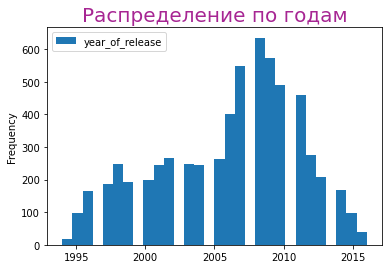

In [318]:
# выводим продажи по топовым платформам по годам
df_to_plot = data[data['platform'].isin(df_top)]
df_to_plot[['platform', 'year_of_release', 'name']]['year_of_release'].plot(kind='hist', bins=30).legend()
plt.title('Распределение по годам', fontdict=font)

Топ платформы начали появляться в конце 90-х, с начала роста производительности консолей и ПК. После 2010 произошел спад, из-за перехода рынка на мобильные платформы и слишком больший вложений в разработку игр

По условию сейчас декабрь 2016 года. Собственно, актуальным периодом можно считать данные с 1994 до 2016 года их и возьмем как актуальный период

AttributeError: 'Line2D' object has no property 'bins'

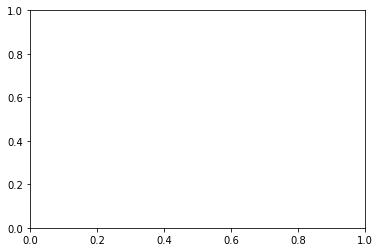

In [319]:
# data['relize_by_year'] = data.groupby(['year_of_release', 'platform'])['name'].count()
df_test = data[['platform', 'year_of_release', 'name']]
df_test = df_test.groupby(['platform', 'year_of_release'])['name'].count()
df_test = df_test.reset_index()

df_test[['platform', 'year_of_release', 'name']]['year_of_release'].plot(kind='line', bins=30).legend()

# df_to_plot[['platform', 'year_of_release', 'name']]['year_of_release'].plot(kind='hist', bins=30).legend()
# plt.title('Распределение по годам', fontdict=font)


In [ ]:
# Возьмем платформы и выведем динамику продаж по каждой платформе, увидим какие лидируют по продажам (логично что и дальше будут).

In [ ]:
# Из топовых платформ постром ящик с усами. Опишем результат

In [320]:
# Берем топовую платформу и строим по ней диаграмму рассеивания по пользователем и по критикам

In [321]:
# Сделаем общее распределение по жанрам, выделяем самые прибыльные

In [322]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,7706.74
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,0,7706.74
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,7706.74
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,7706.74
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,0,7706.74
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,0,7706.74
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0.0,0,7706.74
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,0,7706.74
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,0.0,0,7706.74


__Шаг 4__

In [323]:
# Самые популярные платформы
# Для выявления самой популярной для пользователя в кадом регионе, возьмем топ продаж по платформам в регионе за актуальный период
data_sales = data[data['year_of_release'] >= 1994][['platform', 'na_sales', 'eu_sales', 'jp_sales']].drop_duplicates()

na_top5_sales = data_sales[['na_sales', 'platform']].groupby('platform').sum().reset_index().sort_values(by='na_sales', ascending=False).head(5) # топ 5 по продажам в Северной Америке
eu_top5_sales = data_sales[['eu_sales', 'platform']].groupby('platform').sum().reset_index().sort_values(by='eu_sales', ascending=False).head(5) # топ 5 по продажам в европе
jp_top5_sales = data_sales[['jp_sales', 'platform']].groupby('jp_sales').sum().reset_index().sort_values(by='jp_sales', ascending=False).head(5) # топ 5 по продажам в Японии

print(na_top5_sales)
print(eu_top5_sales)
print(jp_top5_sales)

   platform  na_sales
26     X360    551.10
14      PS2    423.32
24      Wii    387.25
15      PS3    370.44
13       PS    246.65
   platform  eu_sales
15      PS3    318.19
26     X360    258.53
24      Wii    237.01
14      PS2    230.67
3        DS    154.24
     jp_sales platform
219     10.22       GB
218      7.20       GB
217      6.50       DS
216      6.04       DS
215      5.65       DS


Для США и Европы топ практически одинаковые, но по суммарным продажам США обходит все остальные регионы. Связанно это с большим колличеством игроков в этом регионе и большей покупательской способностью.
Регион Японии сам по себе намного меньше США и Европы. Покупательская способность в Японии высокая и колличество игроков тоже. Сказывается меньше колличество покупателей в регионе

In [324]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,7706.74
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,0,7706.74
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,7706.74
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,7706.74
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,0,7706.74
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,0,7706.74
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0.0,0,7706.74
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,0,7706.74
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,0.0,0,7706.74


In [325]:
# Самые популярные жанры
# Популярность можно рассчитать исходя из колличества отзывов критиков и игроков + колличеству выпущенных игр

data_genre_na = data[(data['year_of_release'] >= 1994) & (data['na_sales'] > 0)][['genre', 'critic_score', 'user_score', 'name']].drop_duplicates()
data_genre_eu = data[(data['year_of_release'] >= 1994) & (data['eu_sales'] > 0)][['genre', 'critic_score', 'user_score', 'name']].drop_duplicates()
data_genre_jp = data[(data['year_of_release'] >= 1994) & (data['jp_sales'] > 0)][['genre', 'critic_score', 'user_score', 'name']].drop_duplicates()

# топ жанров по положительным оценкам игроков NA
na_top5_user_genre = data_genre_na[['genre', 'user_score']].groupby('genre').mean().reset_index().sort_values(by='user_score', ascending=False).head(5)

# топ жанров по положительным оценкам игроков EU
eu_top5_user_genre = data_genre_eu[['genre', 'user_score']].groupby('genre').mean().reset_index().sort_values(by='user_score', ascending=False).head(5)

# топ жанров по положительным оценкам игроков JP
jp_top5_user_genre = data_genre_jp[['genre', 'user_score']].groupby('genre').mean().reset_index().sort_values(by='user_score', ascending=False).head(5)


# топ жанров по положительным оценкам критиков NA
na_top5_critic_genre = data_genre_na[['genre', 'critic_score']].groupby('genre').mean().reset_index().sort_values(by='critic_score', ascending=False).head(5)

# топ жанров по положительным оценкам критиков EU
eu_top5_critic_genre = data_genre_eu[['genre', 'critic_score']].groupby('genre').mean().reset_index().sort_values(by='critic_score', ascending=False).head(5)

# топ жанров по положительным оценкам критиков JP
jp_top5_critic_genre = data_genre_jp[['genre', 'critic_score']].groupby('genre').mean().reset_index().sort_values(by='critic_score', ascending=False).head(5)


# топ жанров по выпущеным играм NA
na_top5_game = data_genre_na[['genre', 'name']].groupby('genre').count().reset_index().sort_values(by='name', ascending=False).head(5)

# топ жанров по выпущеным играм NA
eu_top5_game = data_genre_eu[['genre', 'name']].groupby('genre').count().reset_index().sort_values(by='name', ascending=False).head(5)

# топ жанров по выпущеным играм JP
jp_top5_game = data_genre_jp[['genre', 'name']].groupby('genre').count().reset_index().sort_values(by='name', ascending=False).head(5)

# Сделать описание того в каком регионе какая игра самая популярная. Можно схлопнуть до 1 таблички и определить самую популярную игру по 3 показателям

In [326]:
# Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [327]:
# тут из прошлого проекта
#locality_name = df.pivot_table(index='locality_name', values='last_price', aggfunc=['count'])
#locality_name.columns = ['count']
#создаем список из верхних топ-10 городо

#top10 = locality_name.sort_values(by='count', ascending=False).head(10)
#for city in top10.index:
#создает 10 столбцов вида (mean_price, Санкт-Петербург) со средним по городу в каждой строке
#    top10[city] = df.query('locality_name == @city')['price_metr'].mean()
#top10

__Шаг 5__

In [335]:
# Проверка гипотезы среднепользовательские рейтинги платформ Xbox One и PC одинаковые
# Берем среднее значение по пользовательским оценкам по платформе Xbox One и PC
# Моя версия
Xbox_rating = data[data['platform'] == 'XOne'][['platform', 'user_score']].groupby('platform').mean()
PC_rating = data[data['platform'] == 'PC'][['platform', 'user_score']].groupby('platform').mean()

print(np.array(Xbox_rating)[0])
print(np.array(PC_rating)[0])

if np.array(Xbox_rating)[0] == np.array(PC_rating)[0]:
    print("Гипотеза верна")
else:
    print("Отвергаем гипотезу")

[5.02923729]
[5.8753304]
Отвергаем гипотезу


In [343]:
# Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - нулевая гипотеза
# твоя версия + мои догадки
from scipy import stats as st
sample_1 = np.array(data[data['platform'] == 'XOne'][['user_score']]) #срез по столбцу user_score и отбором по Xbox One
sample_2 = np.array(data[data['platform'] == 'PC'][['user_score']]) #срез по столбцу user_score и отбором по PC
results = st.ttest_ind(sample_1, sample_2, equal_var = True)
print('p-значение: ', results.pvalue)

alpha = .05

if results.pvalue < alpha:
    print("Отергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение:  [0.00011629]
Отергаем нулевую гипотезу


In [ ]:
# data.platform.unique()

In [ ]:
# #пыталась сделать срез не получилось, по идее тут должны быть и PS PS2 PS3 PS4
# sample_1 = data.query('platform == `PS`')
# sample_1

In [347]:
# Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports(англ. «спортивные соревнования») разные.
# твоя версия + мои догадки
from scipy import stats as st
sample_1 = np.array(data[data['genre'] == 'Sports'][['user_score']]) #срез по столбцу user_score и отбором по Xbox One
sample_2 = np.array(data[data['genre'] == 'Action'][['user_score']]) #срез по столбцу user_score и отбором по PC
results = st.ttest_ind(sample_1, sample_2, equal_var = True)
print('p-значение: ', results.pvalue)

alpha = .05

if results.pvalue < alpha:
    print("Отергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  [0.00081275]
Отергаем нулевую гипотезу


__Вывод:__
#Как вы сформулировали нулевую и альтернативную гипотезы;
#Какой критерий применили для проверки гипотез и почему